# Problem

Let's choose a "toy" machine learning problem and try to solve it first by ourselves, i.e. without the help of any framework, and then solve the problem using TensorFlow. I believe this is effective learning approach since we can mentally compare both implementation and understand better how a framework works internally.

As a "toy" machine learning problem I chose [artificial neuron with sigmoid activation function](https://en.wikibooks.org/wiki/Artificial_Neural_Networks/Activation_Functions) classifier for two linear separable 2-dimensional sets of features. Why 2-dimensional? Because the data could be visualized on the 2D plane. Why linear separable? We're going to use gradient descent for training and the latter converges for artificial neuron only if a data is linear separable. Let's start.

# Training Data

The code bellow generates two sets of points. Two sets represent classes labeled as '0' and '1'. This is an abstract problem which could be projected onto many real-life problems. For instance, students who passed or failed an exam based on the time spend for learning and number of lectures attended during the term. Apparently, students studied more time and those attended more lectures having more chances to pass an exam.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
%matplotlib inline

/Users/kirill/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


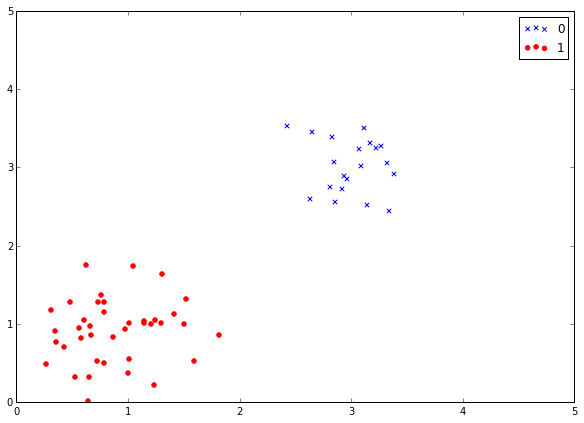

In [4]:
np.random.seed(100)

# The first set. Normally distributed points around the point (3, 3) with the standard deviation 0.33
class1 = np.random.normal(loc=3, scale=0.33, size=(2,20))
# The second set. Normally distributed points around the point (1, 1) with the standard deviation 0.4
class2 = np.random.normal(loc=1, scale=0.4, size=(2,40))
# Merge both sets into the single training set
trainX = np.transpose(np.hstack((class1, class2)))
# Generate merged set of labels for already merged set of training data.
trainY = np.hstack((np.full(class1.shape[1], 0, np.float32), np.full(class2.shape[1], 1, np.float32)))

# Plot generated data.
plt.figure(figsize=(10, 7))
plt.scatter(class1[0], class1[1], color = 'b', marker='x', label='0')
plt.scatter(class2[0], class2[1], color = 'r', marker = 'o', label='1')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.axes()
plt.legend()

# Artificial Neuron

Artificial neuron has the structure shown in the figure below. Essentially, a neuron takes the weighted linear combination of inputs and feeds its value into activation function. The latter should be differentiable, so it is possbile to compute its gradient needed for the learning.

<img height='500' width='500' src='https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png'/>

We are going to use [sigmoid activation function](https://en.wikipedia.org/wiki/Sigmoid_function). 

(-0.1, 1.1)

/Users/kirill/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


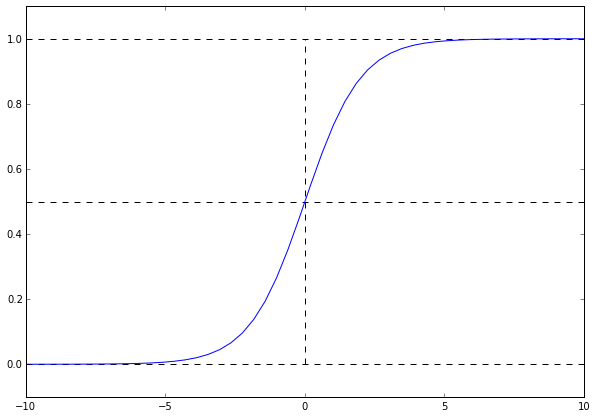

In [5]:
# plots sigmoid function
xs = np.linspace(-10, 10)
plt.figure(figsize=(10, 7))
plt.plot(xs, sp.special.expit(xs))
plt.vlines(0, 0 , 1, linestyles='dashed')
plt.hlines(0.5, -10, 10, linestyles='dashed')
plt.hlines(1, -10, 10, linestyles='dashed')
plt.hlines(0, -10, 10, linestyles='dashed')
plt.ylim(-0.1, 1.1)

# Manual Training

The fit function defined below takes training data and labels as an input and "fits" the model using the gradient descent approach.

In [6]:
def fit(X, y, learningRate=0.1, epochs=100):
    """Fits artificial neuron with sigmoid function to the data X and expected labels y"""
    # initialize weights with zeroes initially.
    W = np.zeros(shape=X.shape[1] + 1, dtype=np.float32)
    
    def activation(X, W):
        """Computes activation function"""
        return sp.special.expit(-np.matmul(X, W[1:]) - W[0])
    
    def gradient(j, X, W, y):
        """Computes gradient for the wieght with index j"""
        xj = 1 if j == 0 else X[:, j - 1]
        z = np.matmul(X, W[1:]) + W[0]
        phi = activation(X, W)
        return np.sum((y - phi)*np.square(phi)*xj*np.exp(z))
    
    def cost(X, W, y):
        """Computes cost function value for the given set of weights"""
        return 0.5*np.square(np.sum(y - activation(X, W)))
    
    costs = []
    # repeat gradient descent epochs number of times
    for i in range(0, epochs):
        # compute weights gradient
        gradients = np.array([gradient(j, X, W, y) for j in range(0, W.shape[0])])
        # update wieghts by moving them in the direction opposite to the gradient direction
        # scaled by learning rate. Eventually, after sufficient number of epochs this should
        # lead to the set of weights for which cost function has the minimum value.
        W += -learningRate*gradients
        # calcualte costs just for logging purposes
        costs.append(cost(X, W, y))
    
    return W, costs

In [17]:
# now we can actually fir the model to the training data
W, costs = fit(trainX, trainY, learningRate=0.1, epochs=50)
# outputs weights array
W

array([-4.26588249,  1.1238364 ,  1.04220152], dtype=float32)

We can visualize how cost was changing with the number of epoch. As we can see gradient descent converged pretty quickly.

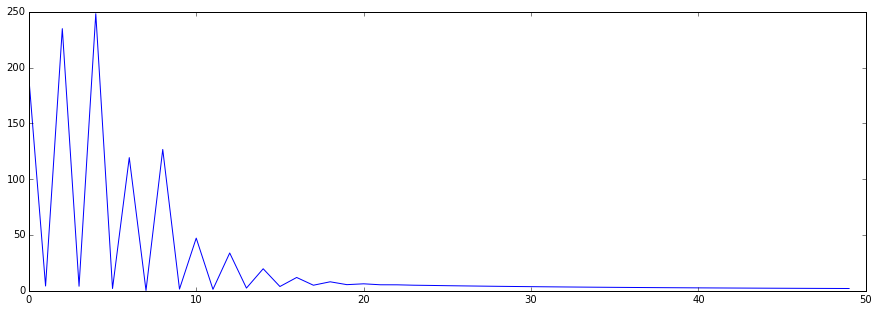

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(costs)), costs)

In [9]:
np.array(sp.special.expit(-np.matmul(trainX, W[1:]) - W[0]) > 0.5, np.int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Now it's time to plot decision boundary. All points above the line are classified as '1' and as '0' below the line. We can see that the obtained line perfectly divides two sets of points belonging of different classes.

/Users/kirill/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


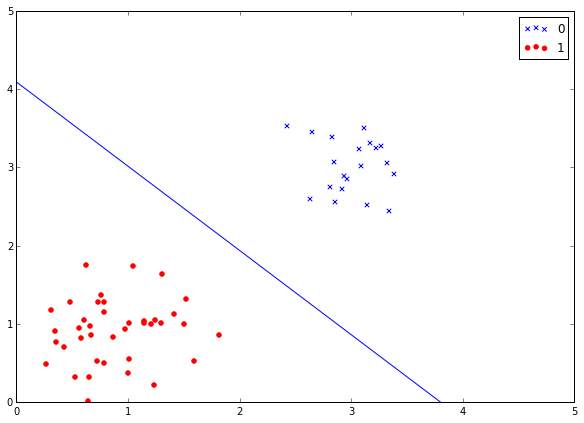

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(np.linspace(-5, 5), -1 * (np.linspace(-5, 5)*W[1]/W[2] + W[0]/W[2]))
plt.scatter(class1[0], class1[1], color = 'b', marker='x', label='0')
plt.scatter(class2[0], class2[1], color = 'r', marker = 'o', label='1')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()

# Training with TensorFlow

Let's now implement the same artificial neuron using Google TensorFlow framework. First we need to create TensorFlow session.

In [11]:
import pyprind
import tensorflow as tf

session = tf.InteractiveSession()

Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x104d11588>>
Traceback (most recent call last):
  File "/Users/kirill/anaconda/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 140, in __del__
    self.close()
  File "/Users/kirill/anaconda/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 905, in close
    self._default_session.__exit__(None, None, None)
  File "/Users/kirill/anaconda/lib/python3.5/contextlib.py", line 66, in __exit__
    next(self.gen)
  File "/Users/kirill/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3215, in get_controller
    assert self.stack[-1] is default
AssertionError: 


And define computational graph which is going to be feeded to the TensorFlow computational engine.

In [12]:
# define placeholders for training data tensors.
x = tf.placeholder(dtype=tf.float32, shape=(None, 2))
y = tf.placeholder(dtype=tf.float32, shape=(None))
# define weghts tensor. This tensor is going to be computed aka "learned" from the input model.
W = tf.Variable([0, 0, 0], dtype=tf.float32)

# define linear transformation and sigmoid operations composed together.
z = tf.reduce_sum(tf.mul(x, W[1:]), 1) + W[0]
ypred = tf.sigmoid(-z)
# calculate the cost
cost = tf.reduce_sum(tf.square(tf.sub(y, ypred)))

# gradient descent operation. Essentially, it just executes feedforward transformation followed
# by backpropagation so weights get updated. This operation plays a role of a single epoch.
costMinimizer = tf.train.GradientDescentOptimizer(.5).minimize(cost)

# initializes all variables
session.run(tf.initialize_all_variables())
costs = []
n = 100
bar = pyprind.ProgBar(n, bar_char='█')
for i in range(0, n):
    # compue one gradient descent epoch. Here is the place where computational graph gets feeded
    # to the computational engine and executed.
    session.run(costMinimizer, feed_dict = {x: trainX, y: trainY})
    # calculate the cost and append it to the list for logging purposes
    costs.append(cost.eval(feed_dict = {x: trainX, y: trainY}))
    bar.update()
    
# outputs weights tensor
W.eval()

0%                          100%
[██████████████████████████████] | ETA: 00:00:00
Total time elapsed: 00:00:00


array([-11.1970911 ,   2.43250084,   3.09110832], dtype=float32)

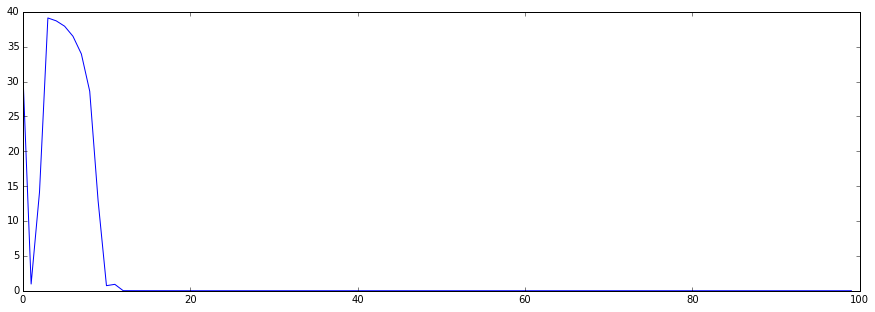

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(costs)), costs)

In [14]:
sp.special.expit(-np.matmul(trainX, W.eval()[1:]) - W.eval()[0]) > .5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

Now we can plot the decision boundary. It looks exactly the same as for artifical neuron implemented by ourselves.

/Users/kirill/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


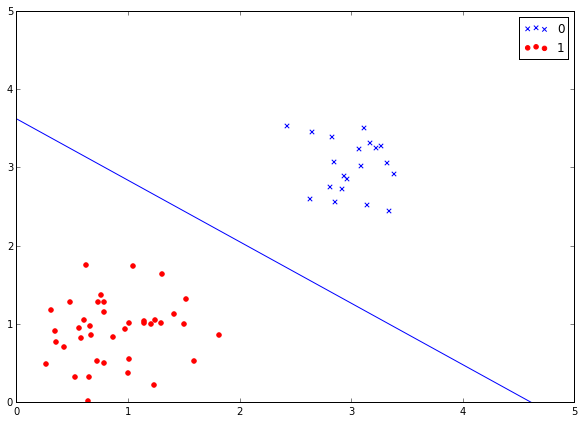

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(np.linspace(-5, 5), -1 * (np.linspace(-5, 5)*W.eval()[1]/W.eval()[2] + W.eval()[0]/W.eval()[2]))
plt.scatter(class1[0], class1[1], color = 'b', marker='x', label='0')
plt.scatter(class2[0], class2[1], color = 'r', marker = 'o', label='1')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()

TensorFlow session should be closed after we're done with computations.

In [16]:
session.close()